In [7]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
block_size = 3
X, Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [8]:
# build the dataset

def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)

      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
# Embedding of all the characters intialized randomly
C = torch.randn((27, 2))

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
emb.view

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([32, 27])

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean()

tensor(15.8737)

In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [9]:
torch.manual_seed(32)

# Main Section

In [49]:
C = torch.randn(27, 10)
W1 = torch.randn(30, 200)
b1 = torch.randn(200)
W2 = torch.randn(200, 27)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [50]:
sum(p.nelement() for p in parameters)

11897

In [51]:
for p in parameters:
  p.requires_grad = True

In [52]:
lri = []
stepi = []
lossi = []

In [61]:
# Training loop

for i in range(50000):

  # Minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32, ))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  # Update parameters
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(i)
  lossi.append(loss.log10().item())

# print(loss.item())

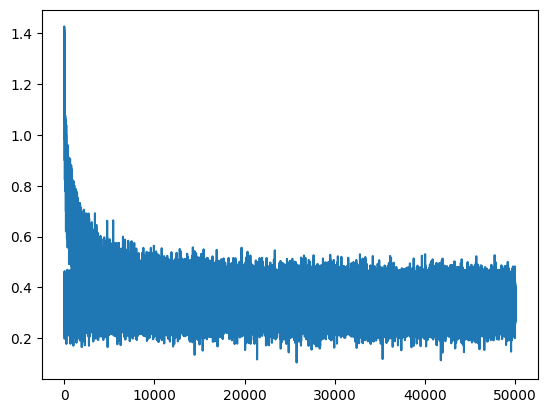

In [62]:
plt.plot(stepi, lossi);

In [63]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 +  b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.149001121520996

In [64]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 +  b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.180752754211426

In [66]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

jiomahifitley.
kohzaiosanatelle.
kidn.
rone.
inatlenyuru.
luka.
ayvett.
damroesuretersiosoelle.
haalairo.
somaanishannis.
curre.
khi.
caimonterginakhifahi.
hawendreyni.
adence.
anna.
laiellisa.
teannoel.
kawlit.
joanny.
